In [1]:
import numpy as np


dz = 1
mld = 200
z = np.arange(0, 4e3+dz, dz)
surface = 25

$t = t_{\text{surface}} az^{b}$

In [2]:
a, b = 115, -0.9
t_mld = [surface] * len(z[:mld])
t_termocline = surface * a * z[mld:]**b

t = np.r_[t_mld, t_termocline]

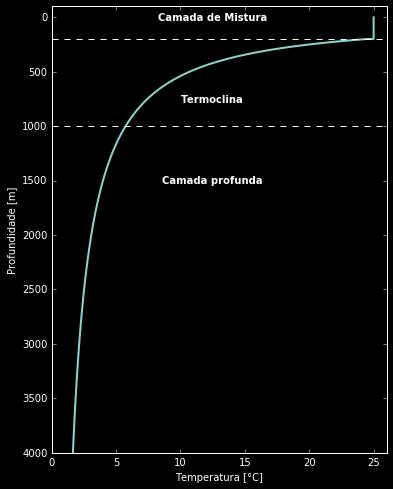

In [3]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt


style.use('dark_background')

xmin, xmax = 0, 26
fig, ax = plt.subplots(figsize=(6, 8))
ax.invert_yaxis()
ax.plot(t, z, linewidth=2, zorder=1)
ax.set_xlim(xmin, xmax)
ax.set_ylim(z.max(), -100)
ax.set_xlabel(u'Temperatura [\u00B0C]')
ax.set_ylabel('Profundidade [m]')

kw = dict(colors='w', zorder=2)
ax.hlines(mld, xmin, xmax, linestyles='--', **kw)
ax.hlines(1000, xmin, xmax, linestyles='--', **kw)

kw = dict(va='center', ha='center', fontweight='semibold')
ax.text(12.5, 0, 'Camada de Mistura', **kw)
ax.text(12.5, 750, 'Termoclina', **kw)
ax.text(12.5, 1500, 'Camada profunda', **kw)
ax.grid(False)

In [4]:
import os


fname = "temperature_profile.png"
fig.savefig(fname, transparent=False)
_ = os.system('convert -trim %s %s' % (fname, fname))